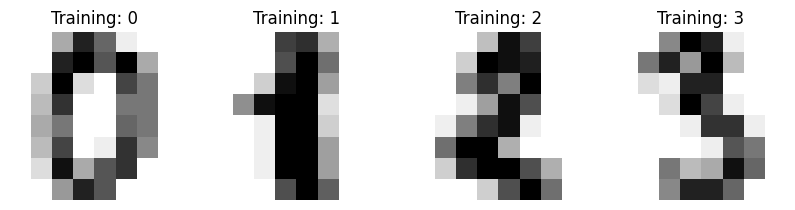

In [ ]:
import pandas as pd


# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split


digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
data = digits.images.reshape((n_samples, -1))
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)



### Objective: Use logistic regression, KNN, Naive Bayes and a decision tree to make the classification, the point is to see who is the best algorithm

In [ ]:
from sklearn.model_selection import cross_val_score

X = data
y = digits.target



clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.96388889, 0.91944444, 0.96657382, 0.9637883 , 0.92479109])

In [ ]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier



# 1. SVM
clf_svm = svm.SVC(kernel='linear', C=1, random_state=42)
scores_svm = cross_val_score(clf_svm, X, y, cv=5)

# 2. Decision tree
clf_tree = DecisionTreeClassifier(random_state=42)
scores_tree = cross_val_score(clf_tree, X, y, cv=5)

# 3. Logistic regression
clf_logreg = LogisticRegression(max_iter=10000, random_state=42)
scores_logreg = cross_val_score(clf_logreg, X, y, cv=5)

# 4. Naive Bayes
clf_nb = GaussianNB()
scores_nb = cross_val_score(clf_nb, X, y, cv=5)

# 5. K-closest
clf_knn = KNeighborsClassifier(weights = "distance")
scores_knn = cross_val_score(clf_knn, X, y, cv=5)

# Show results
print("SVM:", scores_svm.mean())
print("Decision tree:", scores_tree.mean())
print("Logistics regression:", scores_logreg.mean())
print("Naive Bayes:", scores_nb.mean())
print("K-closest: closest:", scores_knn.mean())


SVM: 0.9476973073351903
Árbol de decisión: 0.7885639121015166
Regresión logística: 0.9148777468276075
Naive Bayes: 0.8069281956050759
K-Vecinos más cercanos: 0.9632822655524604


In [ ]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Load data
digits = datasets.load_digits()
X, y = digits.data, digits.target

# 1. SVM
param_grid_svm = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf']
}
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])
grid_svm = GridSearchCV(pipe_svm, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X, y)

# 2. Decision tree
param_grid_tree = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5, scoring='accuracy')
grid_tree.fit(X, y)

# 3. Logistic regression
param_grid_logreg = {
    'logreg__C': [0.01, 0.1, 1, 10]
}
pipe_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=10000))
])
grid_logreg = GridSearchCV(pipe_logreg, param_grid_logreg, cv=5, scoring='accuracy')
grid_logreg.fit(X, y)

# 4. Naive Bayes (does not have many hyperparameters)
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}
grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='accuracy')
grid_nb.fit(X, y)

# 5. KNN
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1: Manhattan, 2: Euclidean
}
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X, y)

# Print better results
print("Better SVM:", grid_svm.best_score_, "con params", grid_svm.best_params_)
print("Best Tree:", grid_tree.best_score_, "con params", grid_tree.best_params_)
print("Best Logistics Regression:", grid_logreg.best_score_, "con params", grid_logreg.best_params_)
print("Best Naive Bayes:", grid_nb.best_score_, "con params", grid_nb.best_params_)
print("Better KNN:", grid_knn.best_score_, "con params", grid_knn.best_params_)


Mejor SVM: 0.9510229031259672 con params {'svc__C': 10, 'svc__kernel': 'rbf'}
Mejor Árbol: 0.788571649644073 con params {'max_depth': 10, 'min_samples_split': 2}
Mejor Regresión logística: 0.9254487774682761 con params {'logreg__C': 0.1}
Mejor Naive Bayes: 0.8325177963478799 con params {'var_smoothing': 1e-07}
Mejor KNN: 0.9515985762921696 con params {'knn__n_neighbors': 5, 'knn__p': 1, 'knn__weights': 'distance'}
